# Abstract

Nowadays, as loans have become part of the main business of commercial banks, predicting whether a customer will default on their loans has become an important issue for commercial banks. This report based on the dataset called "All Lending Club Loan Data” on Kaggle, aiming to build an unsupervised learning model to predict a customer’s default risk. After using SMOTE to oversample this unbalanced classification dataset, I compared the prediction capabilities of the three algorithms (logistic regression, classification tree, and random forest). Finally,  the random forest has shown the best performance in the prediction. 

# Data

The dataset callded "All Lending Club Loan Data Version 6, 2018” comes from Kaggle. The classification purpose is to predict whether customers will default on their loans or not. 

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import csv

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

import statsmodels.api as sm


In [73]:
cw=pd.read_csv('~/Desktop/comp50/dataCOMP0050Coursework1.csv', header = 0)
cw=cw.dropna()
cw.head()

,loan_amnt,term,installment,emp_length,home_ownership,verification_status,issue_d,purpose,dti,earliest_cr_line,...,pub_rec,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,log_annual_inc,fico_score,log_revol_bal,charged_off
0,5675,36,189.56,2.0,RENT,Source Verified,14-Dec,car,15.55,1992,...,0,15.0,15,Individual,0.0,0.0,4.698979,697.0,3.464936,0
1,7000,36,242.63,1.0,RENT,Source Verified,14-Dec,car,6.78,2002,...,0,69.2,5,Individual,0.0,0.0,4.301052,717.0,3.431364,0
2,3500,36,116.24,10.0,MORTGAGE,Not Verified,14-Dec,car,10.65,1997,...,0,12.6,35,Individual,2.0,0.0,4.681250,742.0,3.765520,0
3,10000,36,316.47,10.0,MORTGAGE,Not Verified,14-Dec,car,21.74,1996,...,0,23.7,22,Individual,4.0,0.0,4.875067,707.0,3.424555,0
4,1500,36,46.31,2.0,OWN,Not Verified,14-Dec,car,12.17,1997,...,0,46.5,13,Individual,2.0,0.0,4.812920,712.0,4.448211,0


In [74]:
cw=pd.read_csv('~/Desktop/comp50/dataCOMP0050Coursework1.csv', header = 0)
cw=cw.dropna()
print(cw.shape)
print((cw.columns))

(6802, 21)
Index(['loan_amnt', 'term', 'installment', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'purpose', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'log_annual_inc', 'fico_score',
       'log_revol_bal', 'charged_off'],
      dtype='object')


The dataset provides 6802 All Lending Club customers' records, including 21 fields:'loan_amnt', 'term', 'installment', 'emp_length', 'home_ownership','verification_status', 'issue_d', 'purpose', 'dti', 'earliest_cr_line','open_acc', 'pub_rec', 'revol_util', 'total_acc', 'application_type','mort_acc', 'pub_rec_bankruptcies', 'log_annual_inc', 'fico_score', 'log_revol_bal', and 'charged_off'. 

## Target Variable y

The target variable is "charged_off" which means whether a debtor repay the loan or not--its value is 0 if the debtor repays, 1 otherwise. 

## Independent Variables (features)

1.'loan_amnt': numerical variable, the amount of money that a debtor lent

2.'term': numerical variable, the length of time for a loan to be completely paid off 

3.'installment':numerical variable, the amount the debtor needs to pay regularly  

4.'emp_length':numerical variable, employment length of the debtor

5.'home_ownership':categorical variable("RENT", "OWN, "MORTGAGE")

6.'verification_status':categorical variable("Source Verified","Verified", "Not Verified"), whether the income or income source is verified by the All Lending Club

7.'issue_d':categorical variable, issue date of the loan 

8.'purpose':categorical variable, the purpose of loan  

9.'dti':numerical variable, debt to income ratio 

10.'earliest_cr_line':numerical variable, the earliest credit line 

11.'open_acc':numerical variable, number of open credit lines on the debtor’s record

12.'pub_rec':numerical variable, the number of derogatory public records of a debtor

13.'revol_util': numerical variable, revolving utilization ratio 

14.'total_acc':numerical variable,total number of historical credit lines on the debtor’s record

15.'application_type':categorical variable('Individual', 'Joint App')

16.'mort_acc':numerical variable,total number of credit lines

17.'pub_rec_bankruptcies':numerical variable, number of bankruptcies in debtor's public record 

18.'log_annual_inc':numerical variable, logarithm of the debtor’s annual income

19.'fico_score':numerical variable, Fair Isaac Corporation (FICO) score of a debtor

20.'log_revol_bal':numerical variable, logarithm of total credit revolving balance

As the variable 'verification_status' has three categories, I calculated the category means of target variable "charge_off". As "Source Verified"'s category mean is close to "Verified"'s, I grouped these two categories into "Verified". 

In [75]:
cw.groupby('verification_status').mean()


,loan_amnt,term,installment,emp_length,dti,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,log_annual_inc,fico_score,log_revol_bal,charged_off
verification_status,,,,,,,,,,,,,,,,
Not Verified,7843.069389,37.776892,245.772357,5.374502,14.427898,1999.602258,10.047145,0.151394,39.741036,22.172975,1.558765,0.093958,4.762097,712.745352,3.693593,0.116534
Source Verified,9783.622165,40.395379,301.629722,5.222080,14.984681,2000.288404,10.278562,0.296534,42.486607,22.946941,1.478391,0.171160,4.792294,700.295036,3.707600,0.181429
Verified,10522.522368,41.417756,324.781562,5.475568,15.832368,1999.656573,10.334480,0.265657,44.145286,23.002065,1.577426,0.177564,4.768835,701.363386,3.710129,0.184446


In [76]:
cw['verification_status']=np.where(cw['verification_status'] =='Source Verified', 'Verified', cw['verification_status'])

Because the variable called "issue_d" has lots of (67) categories, I dropped this variable from the dataset. Moreover, variable 'purpose' was dropped as the only purpose of loan is "car."

In [77]:
cw=cw.drop(columns=['purpose'])
cw=cw.drop(columns=['issue_d'])

### Dummy Variable

In [78]:
for elem in cw['home_ownership'].unique():
    cw[str(elem)] = cw['home_ownership'] == elem

for elem in cw['verification_status'].unique():
    cw[str(elem)] = cw['verification_status'] == elem
    
for elem in cw['application_type'].unique():
    cw[str(elem)] = cw['application_type'] == elem

cw=cw.drop(columns=['home_ownership', 'verification_status','application_type'])
cw.columns.values.tolist()
final_var=cw.columns.values.tolist()
cw.head()

,loan_amnt,term,installment,emp_length,dti,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,...,fico_score,log_revol_bal,charged_off,RENT,MORTGAGE,OWN,Verified,Not Verified,Individual,Joint App
0,5675,36,189.56,2.0,15.55,1992,7,0,15.0,15,...,697.0,3.464936,0,True,False,False,True,False,True,False
1,7000,36,242.63,1.0,6.78,2002,3,0,69.2,5,...,717.0,3.431364,0,True,False,False,True,False,True,False
2,3500,36,116.24,10.0,10.65,1997,16,0,12.6,35,...,742.0,3.765520,0,False,True,False,False,True,True,False
3,10000,36,316.47,10.0,21.74,1996,7,0,23.7,22,...,707.0,3.424555,0,False,True,False,False,True,True,False
4,1500,36,46.31,2.0,12.17,1997,8,0,46.5,13,...,712.0,4.448211,0,False,False,True,False,True,True,False


For better modeling, the categorical variables "home_ownership", "verification_status", and "application_type" were converted into dummy variables. After that, the dataset would have 22 independent variables :"loan_amnt", "term", "installment',"emp_length", "dti", "earliest_cr_line", "open_acc" ,  "pub_rec", "revol_util", "total_acc", "mort_acc", "pub_rec_bankruptcies", "log_annual_inc","fico_score", "log_revol_bal", "RENT", "MORTGAGE", "OWN", "Verified", "Not Verified", "Individual",and "Joint App."


# Methodology

## SMOTE for balancing data

In [79]:
X = cw.loc[:, cw.columns != 'charged_off']
y = cw.loc[:, cw.columns == 'charged_off']
print("Number of repayment in original data",len(y[y['charged_off']==0]))
print("Number of charge off in original data",len(y[y['charged_off']==1]))

Number of repay in original data 5759
Number of not repay in original data 1043


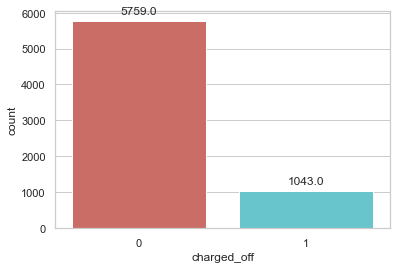

<Figure size 432x288 with 0 Axes>

In [82]:
splot=sn.countplot(x='charged_off',data=cw,palette='hls')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()
plt.savefig('count_balance')

Firstly, as the number of repay in original data 5759 and the number of not repay is 1043, the original dataset has a severe class imbalance. In this case, the SMOTE(Synthetic Minority Oversampling Technique) was used to oversample this imbalanced classification dataset. Specifically, based on the random instances from the minority class of the original dataset, the SMOTE algorithm creates synthetic data points to balance a dataset(Ma & Fan,2017).


In [83]:
X = cw.loc[:, cw.columns != 'charged_off']
y = cw.loc[:, cw.columns == 'charged_off']
from imblearn.over_sampling import SMOTE

ba = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [84]:
ba_data_X,ba_data_y=ba.fit_sample(X_train, y_train)
ba_data_X = pd.DataFrame(data=ba_data_X,columns=columns )
ba_data_y= pd.DataFrame(data=ba_data_y,columns=['charged_off'])

print("length of oversampled data is ",len(os_data_X))
print("Number of repayment in oversampled data",len(os_data_y[os_data_y['charged_off']==0]))
print("Number of charge-off",len(os_data_y[os_data_y['charged_off']==1]))

length of oversampled data is  8042
Number of repayment in oversampled data 4021
Number of charge-off 4021


The SMOTE algorithm is only used to balance the training set, because we want to make sure that no data in the test set involves creating synthetic data points. In other words, the training set and the test set are completely independent of each other. After applying SMOTE algorithm, we get a completely balanced dataset which contains 4021 repayments and 4021 charge-offs.

## Recursive Feature Elimination (RFE) for selecting features


Recursive Feature Elimination (RFE) is a feature selection algorithm whose purpose is to retain more significant features and eliminate secondary features by repeatedly building models based on the balanced training data. In this study, RFE was used to select features in logistic regression Classifier, classification tree classifier, and random forest classifier. Moreover, all 22 features are ranked according their importance, and the selected features are assigned rank 1 which are saved for model fitting in next step.



## Model Fitting (Logistic Regression, Classification Tree, and Random Forest)

Based on the selected features by RFE, three unsupervised learning algorithms (Logistic Regression, Classification Tree, and Random Forest) are used to fit the data and predict the target variable "charge_off." 

## AUC-ROC curve for model performance

Finally, I draw ROC curve (Receiver Operating Characteristic curve) for each classification model and compute the corresponding AUC(Area under the ROC Curve) to compare the prediction capabilities of the three models.

# Results

## Logistic Regression

In [134]:
final_var=cw.columns.values.tolist()
y=['charged_off']
X=[i for i in final_var if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

rfe_lg = RFE(lg,step=1)
rfe_lg = rfe_lg.fit(ba_data_X, ba_data_y.values.ravel())
print(rfe_lg.support_)
print(rfe_lg.ranking_)

/Users/xueerzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/xueerzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

[False  True False False False False  True False False False  True  True
  True False  True  True  True  True  True  True False False]
[11  1  9  4  8  6  1  2  7  3  1  1  1  5  1  1  1  1  1  1 10 12]


/Users/xueerzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/xueerzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

The features selected by RFE are :"term", "open_acc", "mort_acc", "pub_rec_bankruptcies", "log_annual_inc", "log_revol_bal", "RENT", "MORTGAGE", "OWN", "Verified", and "Not Verified." The logistic regression classifier built on those features has accuracy score equal to 0.81728.

In [135]:
lg_var=['term','open_acc','mort_acc','pub_rec_bankruptcies', 'log_annual_inc',
         'log_revol_bal','RENT', 'MORTGAGE', 'OWN', 'Verified', 'Not Verified']

X=ba_data_X[lg_var]
y=ba_data_y['charged_off']

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lg = LogisticRegression()

lg.fit(X_train, y_train)

y_pred_lg=lg.predict(X_test)

print('Accuracy of Logistic Regression classifier on test set: {:.5f}'.format(lg.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.81728


/Users/xueerzheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [136]:
print(confusion_matrix(y_test, y_pred_lg))
print(classification_report(y_test, y_pred_lg))

[[755  67]
 [227 560]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       822
           1       0.89      0.71      0.79       787

    accuracy                           0.82      1609
   macro avg       0.83      0.82      0.81      1609
weighted avg       0.83      0.82      0.82      1609



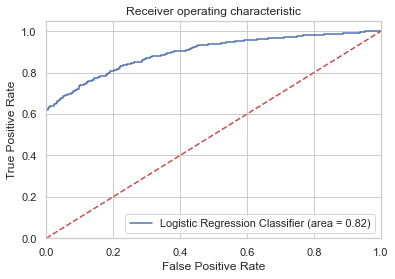

In [137]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lg_roc_auc = roc_auc_score(y_test, lg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression Classifier (area = %0.2f)' % lg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LG_ROC')
plt.show()

Feature: 0, Score: 0.03620
Feature: 1, Score: 0.02094
Feature: 2, Score: -0.06221
Feature: 3, Score: -0.34203
Feature: 4, Score: -2.29020
Feature: 5, Score: 0.35387
Feature: 6, Score: 4.90366
Feature: 7, Score: 4.04169
Feature: 8, Score: 4.14910
Feature: 9, Score: 4.60800
Feature: 10, Score: 3.85662


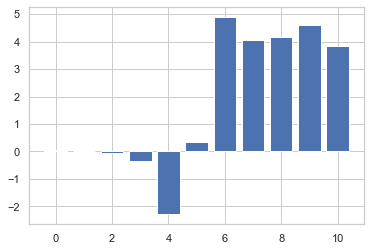

In [140]:
from matplotlib import pyplot
importance = lg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

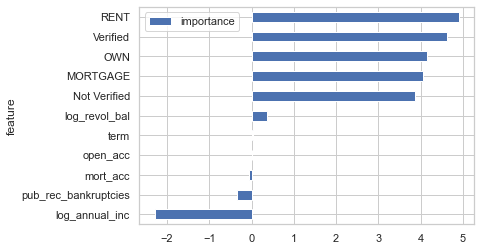

                 feature  importance
4         log_annual_inc   -2.290199
3   pub_rec_bankruptcies   -0.342027
2               mort_acc   -0.062209
1               open_acc    0.020944
0                   term    0.036197
5          log_revol_bal    0.353874
10          Not Verified    3.856623
7               MORTGAGE    4.041693
8                    OWN    4.149103
9               Verified    4.608002
6                   RENT    4.903659


In [153]:
import math

feature_importance_lg = pd.DataFrame(lg_var, columns = ["feature"])
feature_importance_lg["importance"] = lg.coef_[0]
feature_importance_lg = feature_importance_lg.sort_values(by = ["importance"], ascending=True)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance_lg.plot.barh(x='feature', y='importance')
plt.show()

print(feature_importance_lg)

## Decision Tree

In [115]:
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [116]:
dt=DecisionTreeClassifier()
rfe_dt = RFE(dt,step=1)
rfe_dt = rfe_dt.fit(os_data_X, ba_data_y.values.ravel())
print(rfe_dt.support_)
print(rfe_dt.ranking_)

[ True False  True False  True False False False  True False False False
  True  True  True  True  True  True False  True False False]
[ 1  7  1  3  1  5  6 10  1  4  8  9  1  1  1  1  1  1  2  1 11 12]


The features selected by RFE are :"loan_amnt", "installment", "emp_length", "dti", "revol_util", "log_annual_inc", "fico_score", "log_revol_bal", "RENT", "MORTGAGE", and "OWN."

In [130]:
dt_var=['loan_amnt','installment', 'emp_length', 'dti','revol_util',
        'log_annual_inc', 'fico_score','log_revol_bal', 'RENT', 'MORTGAGE', 'OWN']

X=ba_data_X[dt_var]
y=ba_data_y['charged_off']

from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

dt=DecisionTreeClassifier()
dt=dt.fit(X_train, y_train.values.ravel())
y_pred_dt = dt.predict(X_test)

print('Accuracy of Decision Tree classifier on test set: {:.5f}'.format(dt.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.81268


In [131]:
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
dt_feature= pd.Series(dt.feature_importances_,index=X.columns).sort_values(ascending=False)
dt_feature

[[ 957  242]
 [ 210 1004]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1199
           1       0.81      0.83      0.82      1214

    accuracy                           0.81      2413
   macro avg       0.81      0.81      0.81      2413
weighted avg       0.81      0.81      0.81      2413



MORTGAGE          0.144031
RENT              0.128979
fico_score        0.126495
installment       0.093941
log_annual_inc    0.082209
dti               0.078202
loan_amnt         0.073721
log_revol_bal     0.072407
OWN               0.068034
revol_util        0.067143
emp_length        0.064839
dtype: float64

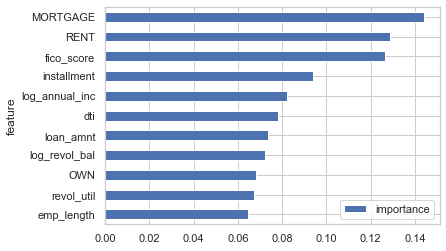

In [151]:
import math

feature_importance_dt = pd.DataFrame(dt_var, columns = ["feature"])
feature_importance_dt["importance"] = dt.feature_importances_
feature_importance_dt = feature_importance_dt.sort_values(by = ["importance"], ascending=True)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance_dt.plot.barh(x='feature', y='importance')
plt.show()

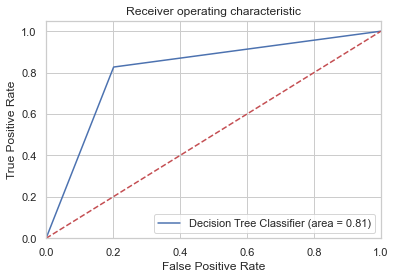

In [132]:
dt_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

## Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rfe_rf = RFE(rf,step=1)
rfe_rf = rfe_rf.fit(ba_data_X, ba_data_y.values.ravel())
print(rfe_rf.support_)
print(rfe_rf.ranking_)
print(ba_data_X.columns)

[ True False  True  True  True False False False  True False  True False
  True  True  True  True False False False  True False False]
[ 1  8  1  1  1  4  6 10  1  3  1  9  1  1  1  1  5  7  2  1 12 11]
Index(['loan_amnt', 'term', 'installment', 'emp_length', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'log_annual_inc', 'fico_score',
       'log_revol_bal', 'RENT', 'MORTGAGE', 'OWN', 'Verified', 'Not Verified',
       'Individual', 'Joint App'],
      dtype='object')


The features selected by RFE are : "loan_amnt", "installment", "emp_length", "dti", "revol_util", "mort_acc", "log_annual_inc", "fico_score", "log_revol_bal", "RENT", and "Not Verified."
       

In [121]:
rf_var=['loan_amnt', 'installment', 'emp_length', 'dti', 'revol_util', 'mort_acc',
        'log_annual_inc', 'fico_score','log_revol_bal', 'RENT', 'Not Verified']

X=ba_data_X[rf_var]
y=ba_data_y['charged_off']

from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rf=RandomForestClassifier()
rf=rf.fit(X_train, y_train.values.ravel())
y_pred_rf = rf.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.5f}'.format(rf.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.88937


In [122]:
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
rf_feature= pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
rf_feature

[[752  70]
 [108 679]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       822
           1       0.91      0.86      0.88       787

    accuracy                           0.89      1609
   macro avg       0.89      0.89      0.89      1609
weighted avg       0.89      0.89      0.89      1609



fico_score        0.123040
mort_acc          0.112440
revol_util        0.106444
installment       0.096595
RENT              0.096591
emp_length        0.095475
dti               0.092414
log_annual_inc    0.091387
loan_amnt         0.089247
log_revol_bal     0.082708
Not Verified      0.013657
dtype: float64

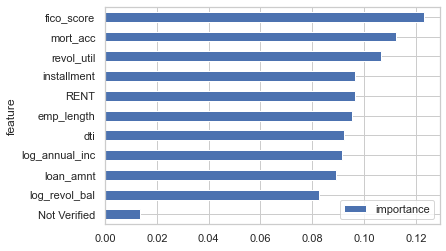

In [150]:
import math

feature_importance_rf = pd.DataFrame(rf_var, columns = ["feature"])
feature_importance_rf["importance"] = rf.feature_importances_
feature_importance_rf = feature_importance_rf.sort_values(by = ["importance"], ascending=True)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance_rf.plot.barh(x='feature', y='importance')
plt.show()

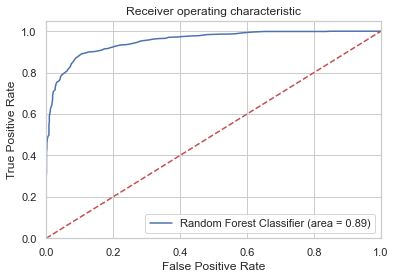

In [128]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

# Conclusion

The goal of this study is to find the best model that can predict whether a customer will default on their loans. By comparing the AUC-OUC curves, the Random Forest Classifier has the highest AUC (=0.88881) and has the closest OUC curve to the upper left corner. Moreover, by comparing the classification reports of those three classifiers, the random forest classifier has the highest precision score for both cases ("repayment"=0.87, and "charge off"=0.91), and it also has the highest recall score for both cases ("repayment"=0.91, and "charge off"=0.86). Overall, the random forest classifier has the highest accuracy of prediction (=0.89). 

Due to the highest AUC, highest accuracy, highest recall and highest accuracy of the random forest classifier, we can conclude that the random forest classifier has the best predictive performance compared to the logistic regression classifier and the classification tree classifier. 
